In [2]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [3]:
def start_play(state:State):
    print("Start Play node has been called ")
    return {"graph_info":state["graph_info" ]+"I am planning to play"}

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info":state["graph_info" ]+"cricket"}

def Badmintion(state:State):
    print("Badmintion node has been called")
    return {"graph_info":state["graph_info" ]+"Badmintion"}

In [4]:
import random 
from typing import Literal

def random_play(state:State)->Literal['cricket','Badmintion']:
    if random.random()>0.5:
        return "cricket"
    else:
        return "Badmintion"

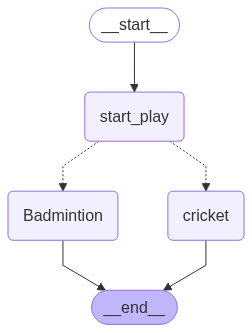

In [5]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
##build Graph
graph=StateGraph(State)
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("Badmintion",Badmintion)

##scheduke the flow of the graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("Badmintion",END)
## compile the graph

graph_builder=graph.compile()

##view
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
graph_builder.invoke({"graph_info":"my name is vikas"})

Start Play node has been called 
Badmintion node has been called


{'graph_info': 'my name is vikasI am planning to playBadmintion'}